In [2]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


plt.style.use(['science', 'std-colors', 'grid'])

plt.rcParams['figure.figsize'] = (3.54, 3.54/1.85)
plt.rcParams["axes.axisbelow"] = True
# plt.rcParams["axes.grid"] = True
# plt.rcParams['figure.dpi'] = 600

In [3]:
lr1_train = pd.read_csv("models/clip-ft-5e-5/train_clip-vit-base-patch16_5e-5.csv")
lr1_val = pd.read_csv("models/clip-ft-5e-5/validation_clip-vit-base-patch16_5e-5.csv")

lr2_train = pd.read_csv("models/clip-ft-1e-5/train_clip-vit-base-patch16_LR_1e-5.csv")
lr2_val = pd.read_csv("models/clip-ft-1e-5/validation_clip-vit-base-patch16_LR_1e-5.csv")

lr3_train = pd.read_csv("models/clip-ft-1e-6/train_clip-vit-base-patch16_LR_1e-6.csv")
lr3_val = pd.read_csv("models/clip-ft-1e-6/validation_clip-vit-base-patch16_LR_1e-6.csv")

lr4_train = pd.read_csv("models/clip-ft-1e-7/train_clip-vit-base-patch16_LR_1e-7.csv")
lr4_val = pd.read_csv("models/clip-ft-1e-7/validation_clip-vit-base-patch16_LR_1e-7.csv")

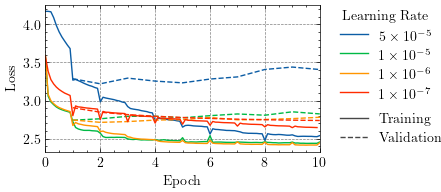

In [22]:
lr1, = plt.plot(lr1_train['epoch'], lr1_train['loss'], label=r'$5\times10^{-5}$', color="#0C5DA5")
plt.plot(lr1_val['epoch'], lr1_val['loss'], label=r'$5\times10^{-5}$', color="#0C5DA5", linestyle="--")

lr2, = plt.plot(lr2_train['epoch'], lr2_train['loss'], label=r'$1\times10^{-5}$', color="#00B945")
plt.plot(lr2_val['epoch'], lr2_val['loss'], label=r'$1\times10^{-5}$', color="#00B945", linestyle="--")

lr3, = plt.plot(lr3_train['epoch'], lr3_train['loss'], label=r'$1\times10^{-6}$', color="#FF9500")
plt.plot(lr3_val['epoch'], lr3_val['loss'], label=r'$1\times10^{-6}$', color="#FF9500", linestyle="--")

lr4, = plt.plot(lr4_train['epoch'], lr4_train['loss'], label=r'$1\times10^{-7}$', color="#FF2C00")
plt.plot(lr4_val['epoch'], lr4_val['loss'], label=r'$1\times10^{-7}$', color="#FF2C00", linestyle="--")


plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.xlim(0, 10)
# plt.ylim(0)

train = Line2D([0], [0], label="Training", color='#474747', linestyle="-")
val = Line2D([0], [0], label="Validation", color='#474747', linestyle="--")
first_legend = plt.legend(handles=[train, val], loc='upper right', bbox_to_anchor=(1.4875, 0.35), frameon=False)

plt.gca().add_artist(first_legend)

plt.legend(title="Learning Rate", handles=[lr1, lr2, lr3, lr4], loc='upper right', bbox_to_anchor=(1.45, 1.05), frameon=False)

plt.savefig("figures/loss_progression_finetune_clip_base.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/loss_progression_finetune_clip_base.pdf",bbox_inches='tight', dpi=600)
plt.show()

In [5]:
print(lr1_val['accuracy'].argmax())
print(lr2_val['accuracy'].argmax())
print(lr3_val['accuracy'].argmax())
print(lr4_val['accuracy'].argmax())

9
4
7
9


In [6]:
print(lr1_train['epoch'][20])
print(lr1_train['loss'][20])
print(lr2_train['loss'][20])
print(lr3_train['loss'][20])
print(lr4_train['loss'][20])

2.0
2.982472419738769
2.571845531463623
2.5934102535247803
2.750497341156006


In [7]:
print(lr1_val['epoch'][1])
print(lr1_val['loss'][1])
print(lr2_val['loss'][1])
print(lr3_val['loss'][1])
print(lr4_val['loss'][1])

2
3.219735366647894
2.7606129732998936
2.713761646097357
2.847131536223672


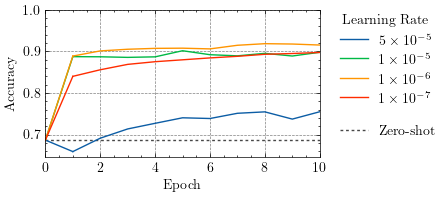

In [25]:
# Zero-shot validation set score (OpenAI CLIP-ViT-B/16)
plt.hlines(0.6866, 0, 10, colors='#474747', linestyles=(0, (2,2)))


plt.plot([0,1], [0.6866, lr1_val['accuracy'][0]], color="#0C5DA5", linestyle="-")
plt.plot(lr1_val['epoch'], lr1_val['accuracy'], label=r'$5\times10^{-5}$', color="#0C5DA5", linestyle="-")


plt.plot([0,1], [0.6866, lr2_val['accuracy'][0]], color="#00B945", linestyle="-")
plt.plot(lr2_val['epoch'], lr2_val['accuracy'], label=r'$1\times10^{-5}$', color="#00B945", linestyle="-")


plt.plot([0,1], [0.6866, lr3_val['accuracy'][0]], color="#FF9500", linestyle="-")
plt.plot(lr3_val['epoch'], lr3_val['accuracy'], label=r'$1\times10^{-6}$', color="#FF9500", linestyle="-")


plt.plot([0,1], [0.6866, lr4_val['accuracy'][0]], color="#FF2C00", linestyle="-")
plt.plot(lr4_val['epoch'], lr4_val['accuracy'], label=r'$1\times10^{-7}$', color="#FF2C00", linestyle="-")




plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xlim(0, 10)
plt.ylim(top=1)

reference = Line2D([0], [0], label="Zero-shot", color='#474747', linestyle=(0, (2,2)))
first_legend = plt.legend(handles=[reference], loc='upper right', bbox_to_anchor=(1.47, 0.30), frameon=False)

plt.gca().add_artist(first_legend)

plt.legend(title="Learning Rate", loc='upper right', bbox_to_anchor=(1.45, 1.05), frameon=False)

plt.savefig("figures/validation_accuracy_finetune_clip_base.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/validation_accuracy_finetune_clip_base.pdf",bbox_inches='tight', dpi=600)
plt.show()

In [11]:
# Get the current style
current_style = plt.rcParams['axes.prop_cycle']

# Extract the colors from the style
colors = [color['color'] for color in current_style]

# Print the colors
print(colors)

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']


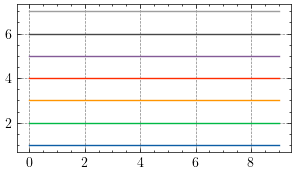

In [12]:
import numpy as np
for i in range(7):
    plt.plot(np.arange(10), np.full(10, i+1))
plt.show()

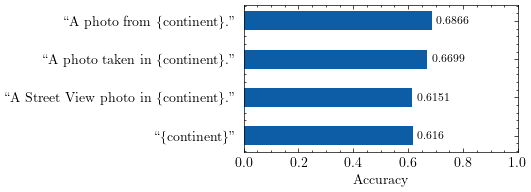

In [13]:
fig = plt.figure(figsize=(3.54, 3.54/1.85))

data = {
    r'``\{continent\}"': 0.6160, 
    r'``A Street View photo in \{continent\}."': 0.6151,
    r'``A photo taken in \{continent\}."': 0.6699,
    r'``A photo from \{continent\}."': 0.6866,
}

bars = plt.barh(data.keys(), data.values(), 0.5)
plt.bar_label(bars, padding=3, fontsize=8)

plt.xlabel('Accuracy')
# plt.title('Validation accuracy with different prompt templates')
plt.xlim(0,1)

plt.grid(False)

plt.savefig("figures/clip-vit-base-16-continent-zeroshot.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/clip-vit-base-16-continent-zeroshot.pdf",bbox_inches='tight', dpi=600)
plt.show()

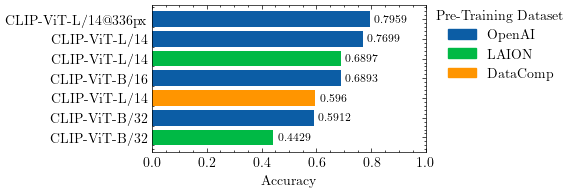

In [26]:


fig = plt.figure(figsize=(3.54, 3.54/1.85))

openai = '#0C5DA5'
laion = '#00B945'
datacomp = '#FF9500'

# Test accuracy
data = [
    ('CLIP-ViT-B/32', 0.5912, openai),  
    ('CLIP-ViT-B/16', 0.6893, openai), 
    ('CLIP-ViT-L/14', 0.7699, openai), 
    ('CLIP-ViT-L/14@336px', 0.7959, openai),
    ('CLIP-ViT-B/32 ', 0.4429,laion), # laion/CLIP-ViT-B-32-laion2B-s34B-b79K
    ('CLIP-ViT-L/14 ', 0.6897, laion), # laion/CLIP-ViT-L-14-laion2B-s32B-b82K
    ('CLIP-ViT-L/14  ', 0.5960, datacomp), # laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K
]
data.sort(key=lambda tup: tup[1])

bars = plt.barh([model for model,_,_ in data], [score for _,score,_ in data], color=[color for _,_,color in data])
plt.bar_label(bars, padding=3, fontsize=8)

plt.xlabel('Accuracy')
plt.xlim(0,1)

blue = mpatches.Patch(color=openai, label='OpenAI')
green = mpatches.Patch(color=laion, label='LAION')
yellow = mpatches.Patch(color=datacomp, label='DataComp')
plt.legend(title="Pre-Training Dataset", handles=[blue, green, yellow], loc='upper right', bbox_to_anchor=(1.55, 1.05), frameon=False)

plt.grid(False)

plt.savefig("figures/clip-vit-models-continent-zeroshot.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/clip-vit-models-continent-zeroshot.pdf",bbox_inches='tight', dpi=600)
plt.show()

# Additional Training Data

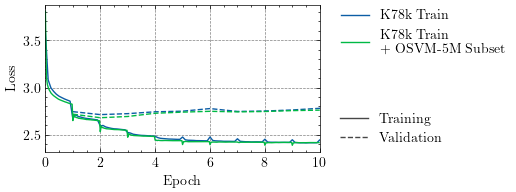

In [28]:

additional_data_train = pd.read_csv("models/clip-ft-base-osv5m-continent/train_clip-vit-base-patch16-osv5m-ft.csv")
additional_data_val = pd.read_csv("models/clip-ft-base-osv5m-continent/validation_clip-vit-base-patch16-osv5m-ft.csv")



p1, = plt.plot(lr3_train['epoch'], lr3_train['loss'], label="K78k Train", color="#0C5DA5")
plt.plot(lr3_val['epoch'], lr3_val['loss'], label="K78k Train", color="#0C5DA5", linestyle="--")


p2, = plt.plot(additional_data_train['epoch'], additional_data_train['loss'], label="K78k Train\n+ OSVM-5M Subset", color="#00B945")
plt.plot(additional_data_val['epoch'], additional_data_val['loss'], label="K78k Train\n+ OSVM-5M Subset", color="#00B945", linestyle="--")



plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.xlim(0, 10)
# plt.ylim(0)

train = Line2D([0], [0], label="Training", color='#474747', linestyle="-")
val = Line2D([0], [0], label="Validation", color='#474747', linestyle="--")
first_legend = plt.legend(handles=[train, val], loc='upper right', bbox_to_anchor=(1.4875, 0.35), frameon=False)

plt.gca().add_artist(first_legend)

plt.legend(handles=[p1, p2], loc='upper right', bbox_to_anchor=(1.725, 1.05), frameon=False)

plt.savefig("figures/loss_progression_additional_training_data.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/loss_progression_additional_training_data.pdf",bbox_inches='tight', dpi=600)
plt.show()

In [16]:
print(f"Epoch {lr3_val["loss"].argmin()+1}, {lr3_val["loss"].min()}")

Epoch 2, 2.713761646097357


In [17]:
print(f"Epoch {additional_data_val["loss"].argmin()+1}, {additional_data_val["loss"].min()}")

Epoch 2, 2.680800871415572


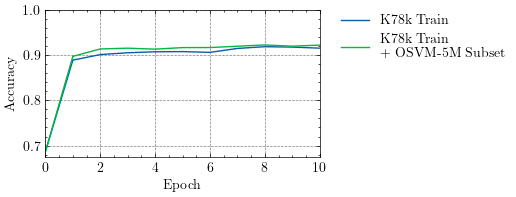

In [29]:
# Zero-shot validation set score (OpenAI CLIP-ViT-B/16)
# plt.hlines(0.6866, 0, 10, colors='#474747', linestyles=(0, (1,2)))

plt.plot([0,1], [0.6866, lr3_val['accuracy'][0]], color="#0C5DA5", linestyle="-")
plt.plot(lr3_val['epoch'], lr3_val['accuracy'], label="K78k Train", color="#0C5DA5", linestyle="-")


plt.plot([0,1], [0.6866, additional_data_val['accuracy'][0]], color="#00B945", linestyle="-")
plt.plot(additional_data_val['epoch'], additional_data_val['accuracy'], label="K78k Train\n+ OSVM-5M Subset", color="#00B945", linestyle="-")



plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xlim(0, 10)
plt.ylim(top=1)

# reference = Line2D([0], [0], label="Zero-shot", color='#474747', linestyle=(0, (1,2)))
# first_legend = plt.legend(handles=[reference], loc='upper right', bbox_to_anchor=(1.47, 0.30))

# plt.gca().add_artist(first_legend)

plt.legend(loc='upper right', bbox_to_anchor=(1.725, 1.05), frameon=False)

plt.savefig("figures/validation_accuracy_additional_training_data.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/validation_accuracy_additional_training_data.pdf",bbox_inches='tight', dpi=600)
plt.show()

In [19]:
print(f"Epoch {lr3_val["accuracy"].argmax()+1}, {lr3_val["accuracy"].max()}")

Epoch 8, 0.9182336182336184


In [20]:
print(f"Epoch {additional_data_val["accuracy"].argmax()+1}, {additional_data_val["accuracy"].max()}")

Epoch 8, 0.922079772079772
